In this notebook we are going to experiment with creating a square wave from a sine wave of the same
frequency along with its odd harmonics. -- Al Williams, Hackaday
First let's do a little setup


In [2]:
import numpy as np
import matplotlib.pyplot as plot


We ought to make a few things configurable (see last topic for how you could make these widgets)

In [101]:
maxtime=6.28*5;  # maximum time on X axis (2pi x number of cycles)
amplitude=1.0;  # amplitude of fundamental sine
resolution=0.1;  # time scale resolution (default =0.1)

We also need some time for our X axis

In [104]:
time=np.arange(0,maxtime,resolution);

Now we can make the fundamental wave

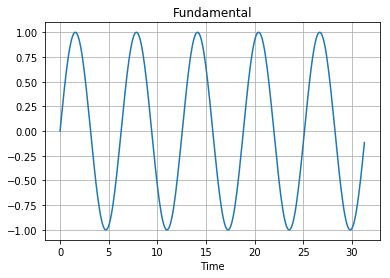

In [105]:
a0=amplitude*np.sin(time);
plot.plot(time,a0);
plot.title("Fundamental");
plot.xlabel("Time");
plot.grid(True,which="both");

Let's create the 3rd harmonic. To get a new frequency we have to multiply time. We also need 1/3 of the amplitude so we'll multiply the whole thing by amplitude/3.

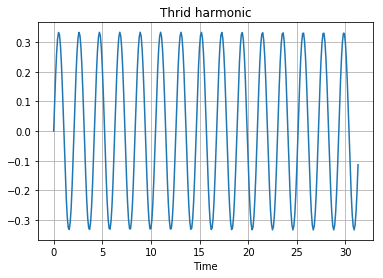

In [106]:
f3=amplitude/3*np.sin(time*3);
plot.plot(time,f3);
plot.title("Third harmonic");
plot.xlabel("Time");
plot.grid(True,which="both");


Let's see what adding them together gives us

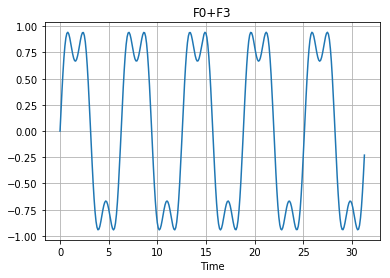

In [107]:
a3=a0+f3;
plot.plot(time,a3);
plot.title("F0+F3");
plot.xlabel("Time");
plot.grid(True,which="both");


Gee, that's pretty square already! And that's just one odd harmonic. Let's add the 5th harmonic. Note that each harmonic's amplitude is 1/n in amplitude where n=3,5,7,etc.

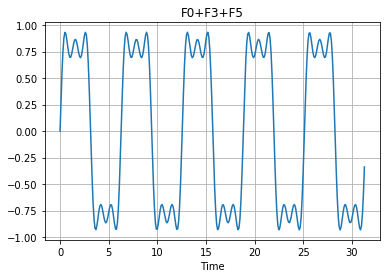

In [108]:
f5=amplitude/5*np.sin(time*5);
a5=a0+f3+f5;
plot.plot(time,a5);
plot.title("F0+F3+F5");
plot.xlabel("Time");
plot.grid(True,which="both");

Now let's add quite a few more

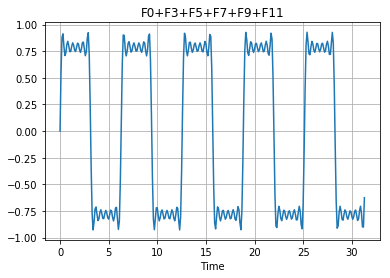

In [109]:
f7911=amplitude/7*np.sin(time*7)+amplitude/9*np.sin(time*9)+amplitude/11*np.sin(time*11);
a11=a0+f3+f5+f7911;
plot.plot(time,a11);
plot.title("F0+F3+F5+F7+F9+F11");
plot.xlabel("Time");
plot.grid(True,which="both");

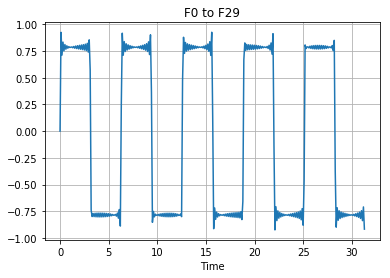

In [110]:
atotal=a11;
for i in range(13,30,2):
    atotal=atotal+amplitude/i*np.sin(time*i);
plot.plot(time,atotal);
plot.title("F0 to F29");
plot.xlabel("Time");
plot.grid(True,which="both");

Note the time resolution means that at higher frequencies we might not get many points on the sine wave unless we crank up the resolution. Let's see what that 29th harmonic looks like

In [111]:
from ipywidgets import interact;
import ipywidgets as widgets;


def recalc(v):
    if (v==0.0): v=resolution;
    texample=np.arange(0,6.28/29*2,v);
    a29=amplitude/29*np.sin(texample*29);
    plot.plot(texample,a29, marker='*');
    plot.title("A29");
    plot.xlabel("Time");
    plot.grid(True,which="both");

interact(recalc,v=widgets.FloatSlider(value=0.0, min=0.0,max=0.1, step=0.005, readout_format='.3f', description="resolution (0 for default)"));

interactive(children=(FloatSlider(value=0.0, description='resolution (0 for default)', max=0.1, readout_format…

You can see each cycle only gets a few points. At 0.1--the default--you get aliasing! Use the slider to try a different resolution! AT 0.01, things will look better. If you change the slider in the above example, you'll want to go back to the top of the document and set resolution for the other cells and then rerun everything after you are satisfied with the result.

In [120]:
def harmonic_recalc(v):
    texample=np.arange(0,maxtime,.005);
    atotal=amplitude*np.sin(texample);
    i=1;  # in case for loop blows out
    for i in range(3,v+1,2):
        atotal=atotal+amplitude/i*np.sin(texample*i);
    plot.plot(texample,atotal);
    plot.title("Harmonic " + str(i));
    plot.xlabel("Time");
    plot.grid(True,which="both");

interact(harmonic_recalc,v=widgets.IntSlider(value=1, min=1,max=35, step=2, description="maximum harmonic"));

interactive(children=(IntSlider(value=1, description='maximum harmonic', max=35, min=1, step=2), Output()), _d…